In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [86]:
df = pd.read_csv('teleCust1000t.csv')
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [87]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

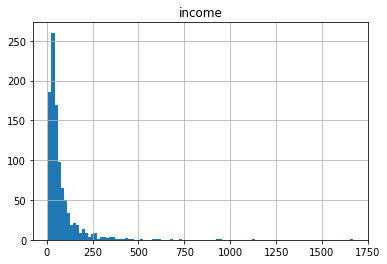

In [6]:
df.hist(column='income', bins=100)

In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [14]:
#set X (independent variables) and y (dependent variable)
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ','retire','gender','reside']].values
y = df['custcat'].values
print(X[0:5])
print(y[0:5])

[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]
 [  2.  33.  33.   0.  12.  33.   2.   0.   0.   1.   1.]
 [  2.  23.  30.   1.   9.  30.   1.   2.   0.   0.   4.]]
[1 4 3 1 3]


In [22]:
#normalize data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
print(X[0:5])

[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


In [35]:
#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print ('Train Dataset:', X_train.shape,  y_train.shape)
print ('Test Dataset: ', X_test.shape,  y_test.shape)

Train Dataset: (800, 11) (800,)
Test Dataset:  (200, 11) (200,)


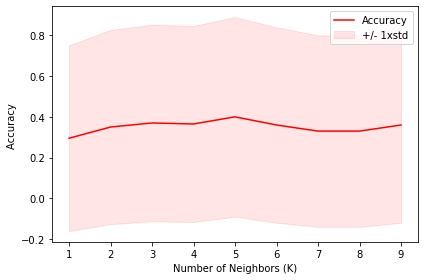

k value: 5


In [76]:
#find optimal value of K for KNN
K = 10
from sklearn.neighbors import KNeighborsClassifier
mean_acc = np.zeros(K-1)
std_acc = np.zeros(K-1)

for i in range(1,K):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    mean_acc[i-1] = np.mean(pred_i == y_test)
    std_acc[i-1] = np.std(pred_i == y_test)

plt.plot(range(1,K),mean_acc,'r')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10, color='r')
plt.legend(('Accuracy', '+/- 1xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print('k value:', mean_acc.argmax()+1)

In [77]:
#train model
k = mean_acc.argmax()+1
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

In [78]:
#predict
y_pred = knn.predict(X_test)
print('y pred:', y_pred[0:5])
print('y:     ', y_test[0:5])

y pred: [1 3 2 2 2]
y:      [4 1 3 3 1]


In [79]:
#accuracy
from sklearn import metrics
train_accuracy = metrics.accuracy_score(y_train, knn.predict(X_train))
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Train Dataset Accuracy:", train_accuracy)
print("Test Dataset Accuracy: ", test_accuracy)

Train Dataset Accuracy: 0.52
Test Dataset Accuracy:  0.4
